In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,6)

In [2]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [3]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df.shape

(2845342, 47)

# EDA

In [5]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [8]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

14

## Missing Values

In [9]:
df.isnull().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [10]:
missing_percentage = df.isnull().sum().sort_values(ascending = False) /len(df) * 100
missing_percentage

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

<AxesSubplot:>

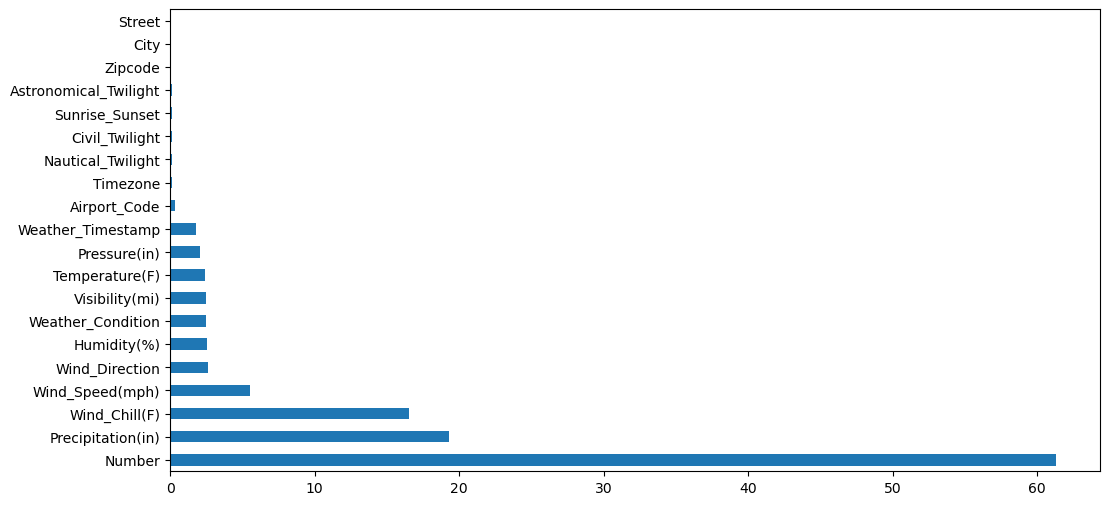

In [11]:
missing_percentage[missing_percentage!=0].plot(kind  = 'barh')

In [12]:
#Function to barplot along with percentage 
def barplot_values_percent(ax):
    heightlst = []
    for i in ax.patches:
        heightlst.append(i.get_height())
    total = sum(heightlst)
    
    for i in ax.patches:
        x = i.get_x()+0.05 #adjust the numbers (higher numbers = to the right, lower = to the left)
        height = i.get_height()+0.1 #adjust the numbers (higher numbers = up, lower = down)
        value = ("{0:.2f}".format((i.get_height()/total)*100)+'%')
        
        ax.text(x, height, value, fontsize=10,color='black')

## Exploratory Analysis and Data Visualization
Columns Analysed:
1. City
2. Start Time
3. Start Lat, Start Long
4. Weather Condition

# 1. Cities 

In [13]:
cities = df.City.unique()
len(cities)

11682

In [14]:
cities_by_accidents = df.City.value_counts()
cities_by_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

#### Top 20 Cities with maximum number of accidents

In [15]:
cities_by_accidents[:20]

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

### Miami has the maximum count of accidents 106966

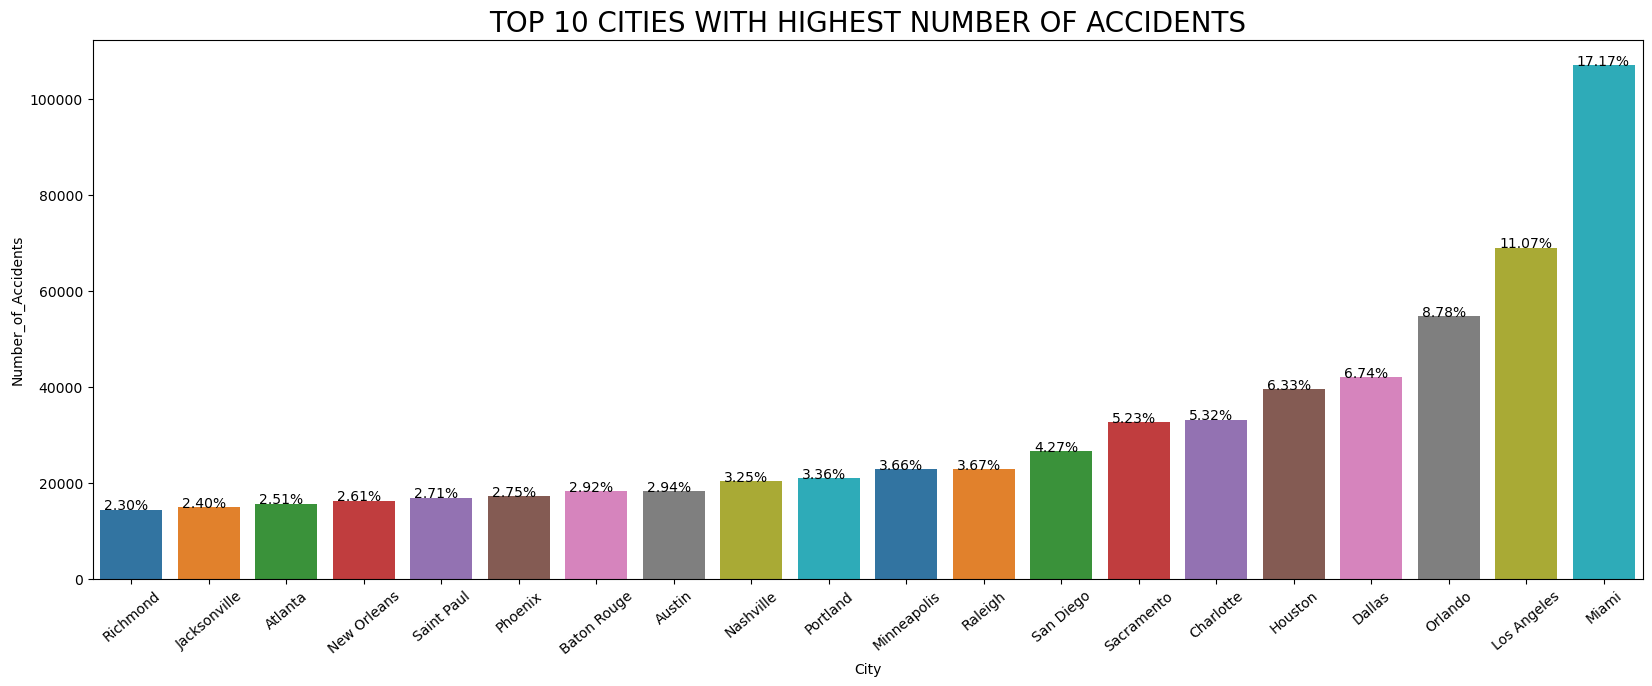

In [16]:
top_cities=df["City"].value_counts().sort_values()[-20:].reset_index()
top_cities.columns=["City","Number_of_Accidents"]

plt.figure(figsize=(20,7))
p1 = sns.barplot(x="City",y="Number_of_Accidents",data=top_cities , palette='tab10')
plt.title("TOP 10 CITIES WITH HIGHEST NUMBER OF ACCIDENTS",fontsize=20)
plt.xticks(rotation=40)
barplot_values_percent(p1)
plt.show()

In [17]:
#Pandas check if value exists in a column
'New York' in df.City

False

In [18]:
'NY' in df.State

False

#### Data for New York is not Present

C:\Users\rachit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

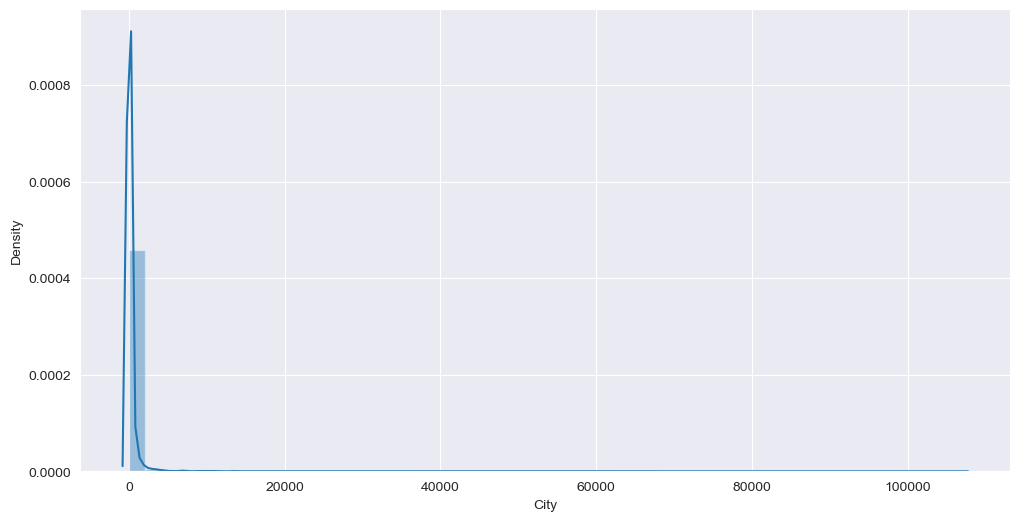

In [19]:
sns.set_style("darkgrid")
sns.distplot(cities_by_accidents)

## From distplot
Most of the cities have accident less than 1000

In [20]:
high_accident_cities = cities_by_accidents[cities_by_accidents>1000]
low_accident_cities = cities_by_accidents[cities_by_accidents<=1000 ]
print("High Accident cities, Accidents greater 1000: ", len(high_accident_cities))
print("Low Accident cities Accidents less than 1000: ", len(low_accident_cities))

High Accident cities, Accidents greater 1000:  494
Low Accident cities Accidents less than 1000:  11187


In [21]:
print("High Accident cities: ", len(high_accident_cities)/len(cities) *100, "% ")
print("Low Accident cities: ", len(low_accident_cities)/len(cities) *100, "% ")

High Accident cities:  4.228727957541517 % 
Low Accident cities:  95.76271186440678 % 


C:\Users\rachit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

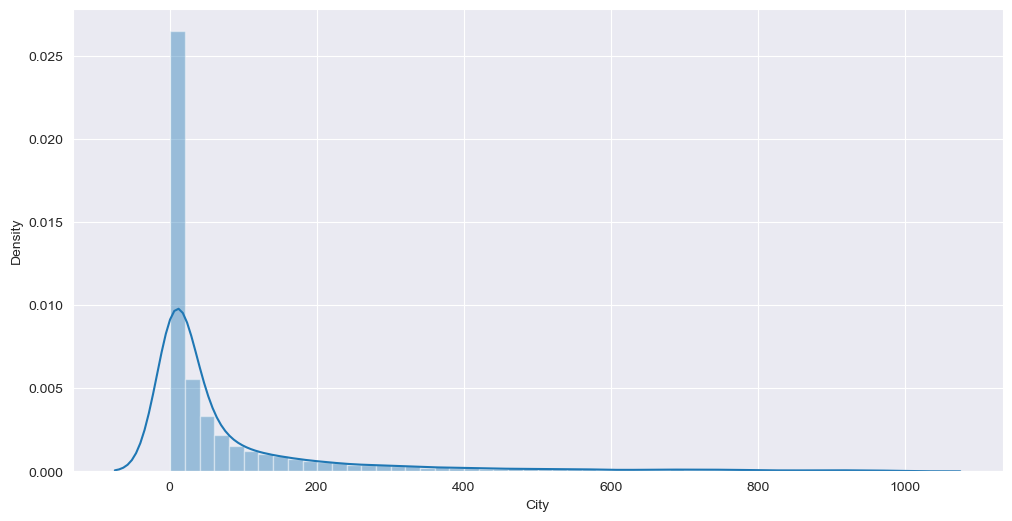

In [22]:
sns.distplot(low_accident_cities)

C:\Users\rachit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City', ylabel='Density'>

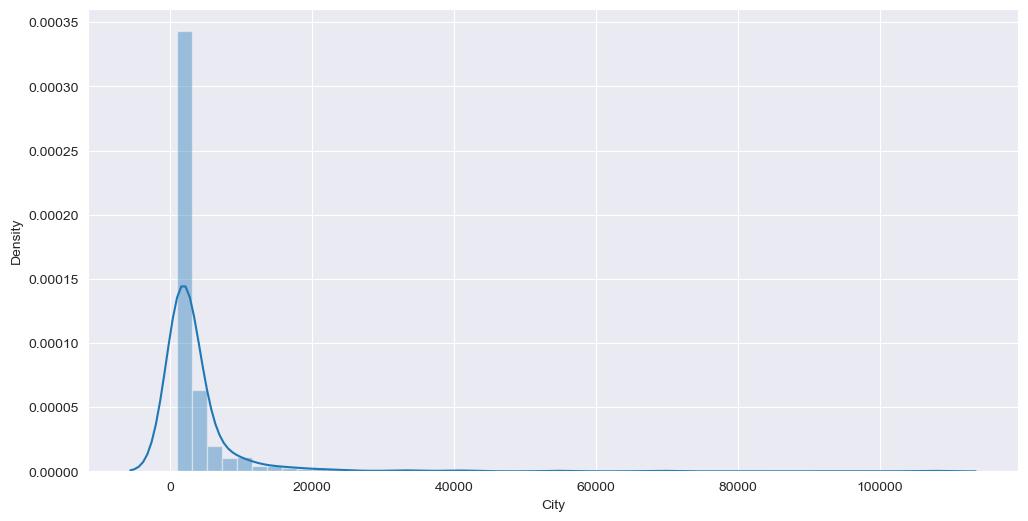

In [23]:
sns.distplot(high_accident_cities)

### Less than 5% of cities have more than 1000 yearly accidents

<AxesSubplot:xlabel='City', ylabel='Count'>

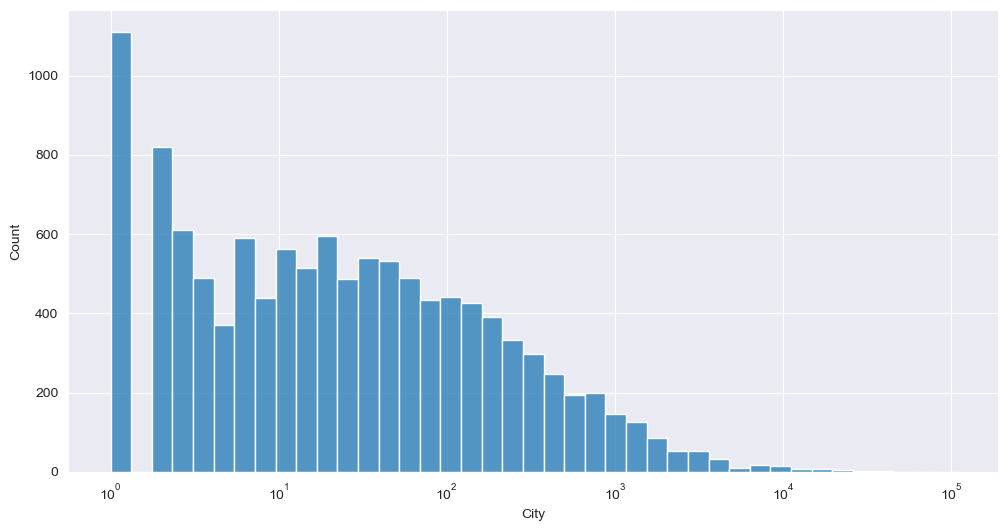

In [24]:
sns.histplot(cities_by_accidents,log_scale=True)

In [25]:
len(cities_by_accidents[cities_by_accidents==1])/len(cities_by_accidents) * 100

9.502611077818681

## ~10% of cities have reported 1 accident(should check for consistency of data)

In [26]:
len(cities_by_accidents[cities_by_accidents==1])
#over 1100 cities reported 1 accident

1110

<AxesSubplot:xlabel='City', ylabel='Count'>

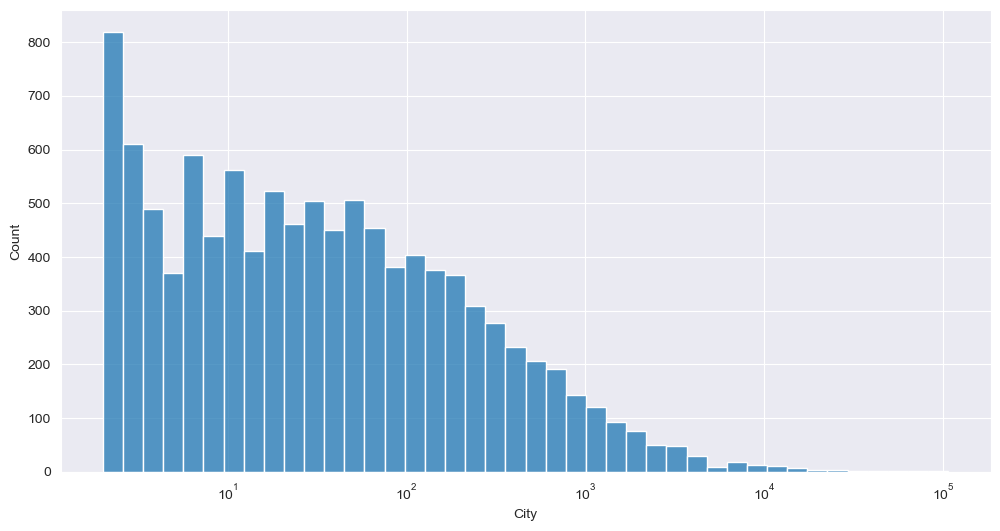

In [27]:
sns.histplot(cities_by_accidents[cities_by_accidents!=1],log_scale=True)

# 2. Start Time

In [28]:
df.Start_Time[0]

'2016-02-08 00:37:08'

In [29]:
type(df.Start_Time[0])

str

In [30]:
df.Start_Time = pd.to_datetime(df.Start_Time)

In [31]:
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

1. What Time of day are accidents most frequent in?
2. Which days of the week have the most accidents?
3. Which months have most accidents?
4. What is the trend of accidents year over year?

### 1. What Time of day are accidents most frequent in?

C:\Users\rachit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Start_Time'>

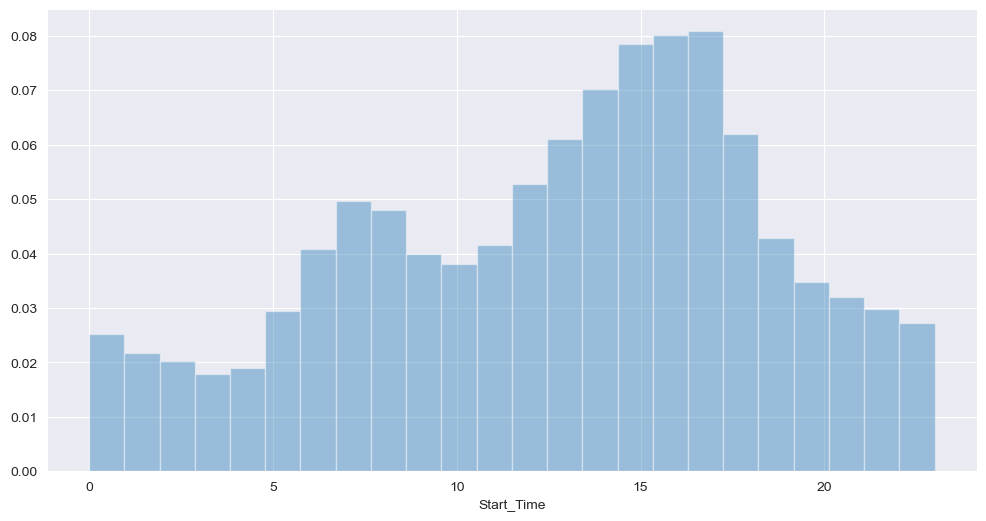

In [32]:
#HOUR
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,norm_hist=True)

## 3 PM to 7 PM
#### 5 PM is the most deadliest hour for accidents

<AxesSubplot:xlabel='Start_Time'>

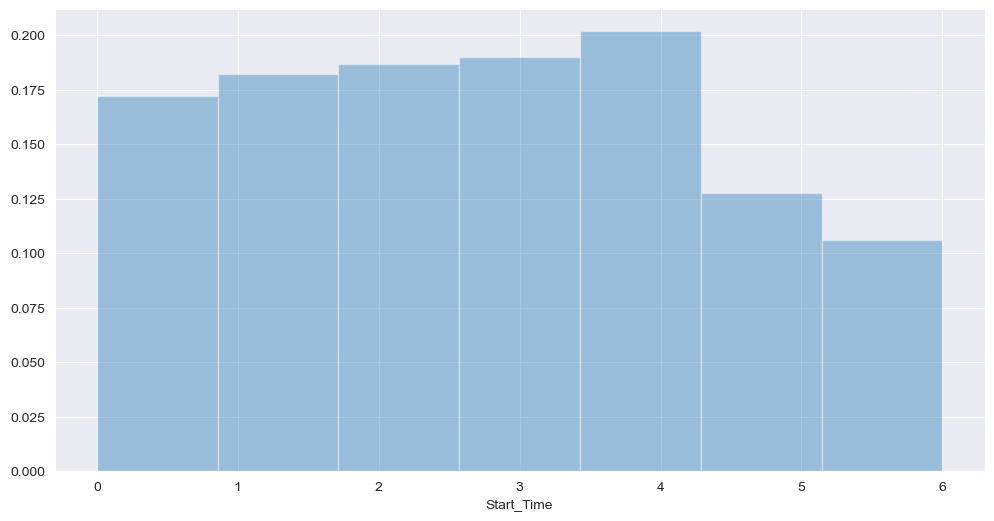

In [33]:
 #Day of Week
sns.distplot(df.Start_Time.dt.dayofweek,bins=7,kde=False,norm_hist=True)

#### On weekends number of accidents are lower as compared to weekdays
#### Friday has the most accident cases among all weekdays

#### Is the distribution of accidents by hour the same on weekends as on weekdays?

Monday


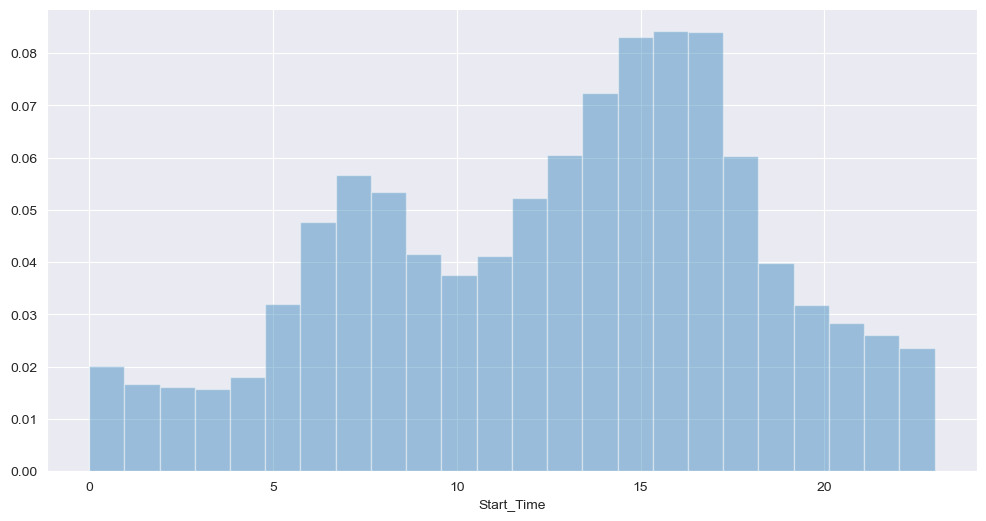

Tuesday


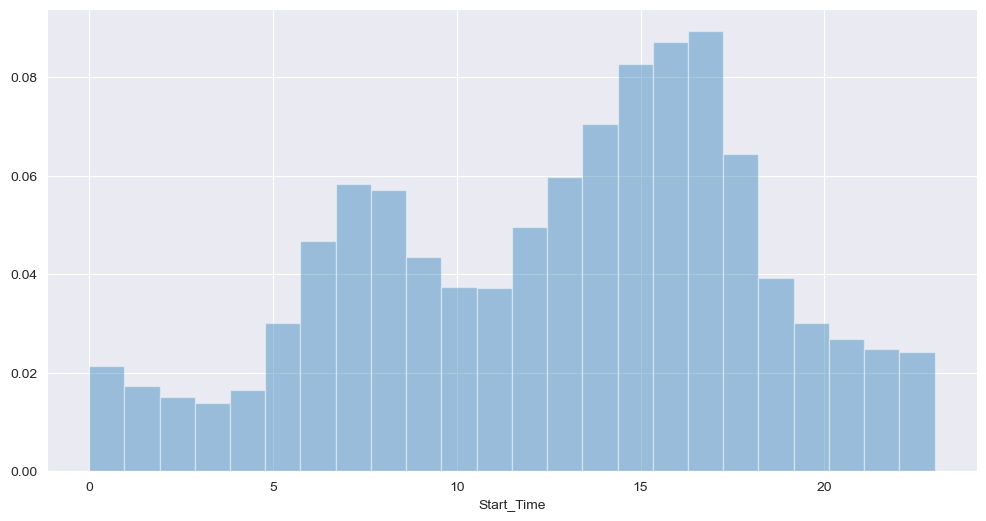

Wednesday


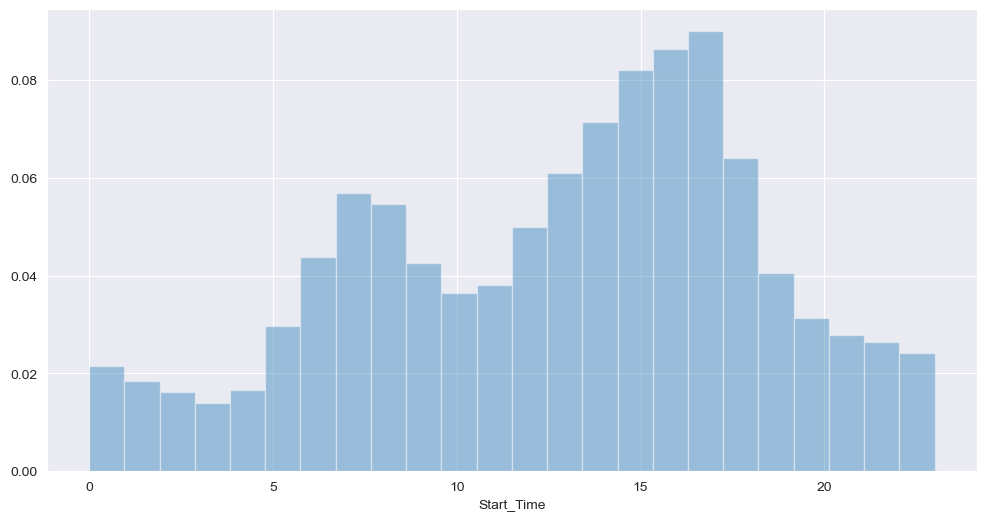

Thursday


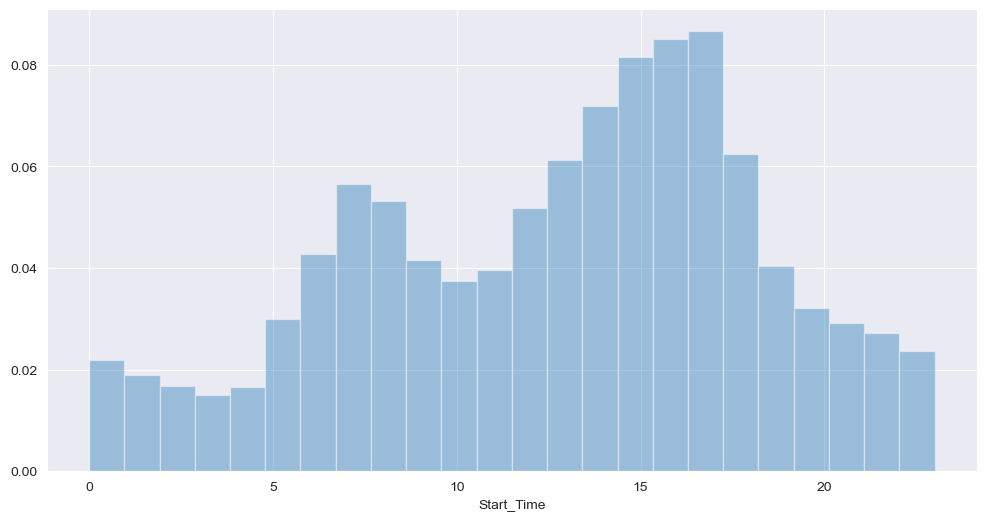

Friday


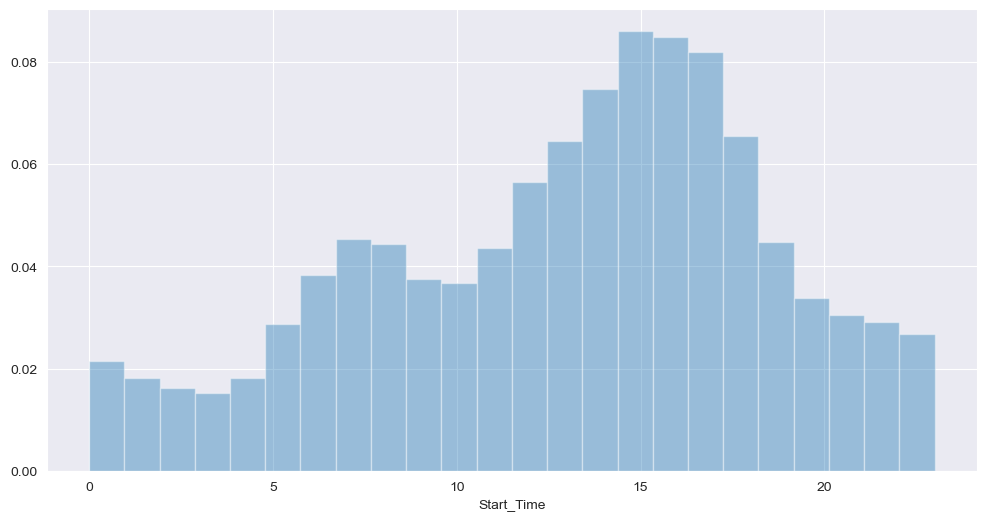

Saturday


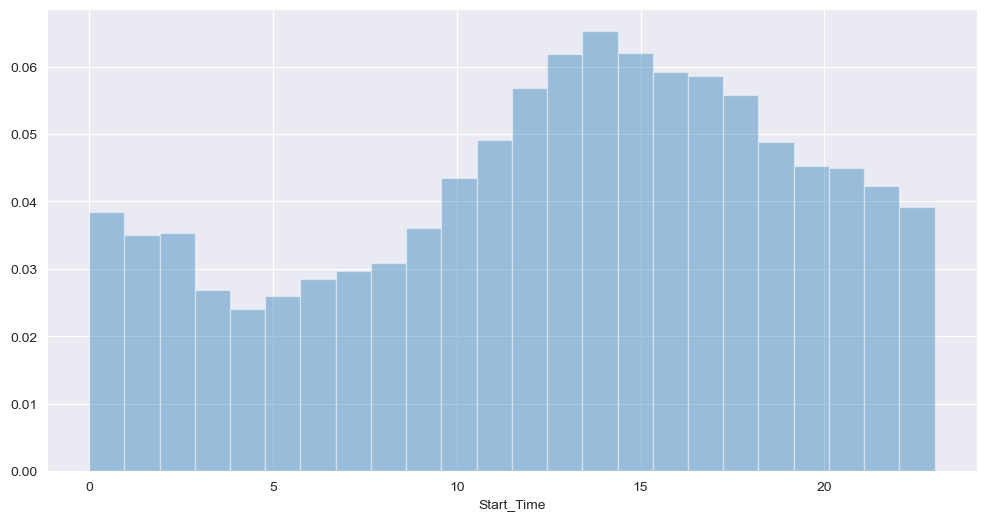

Sunday


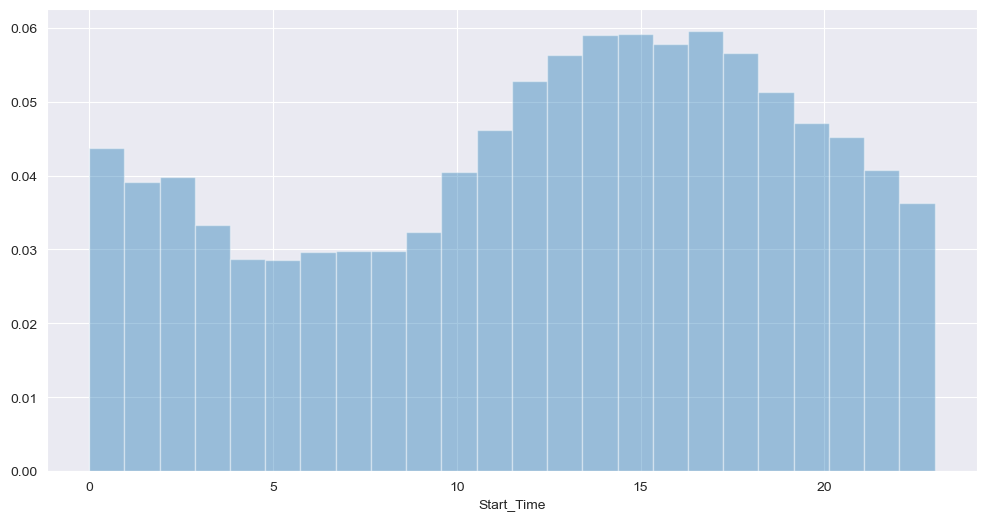

In [34]:
d = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
for i in range(0,7):
    print(d[i])
    day = df.Start_Time[df.Start_Time.dt.dayofweek==i]
    sns.distplot(day.dt.hour,bins=24,kde=False,norm_hist=True)
    plt.show()

### Comparing Accidents on weekends and weekdays accidents are High during 2 PM to 5 PM.

#### Which year has maximum accidents? 

In [35]:
year_max_acc=df.Start_Time.dt.year.value_counts()
year_max_acc

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

### Year 2021 has the most highest count of accidents i.e 1511745

### Yearly trend of accidents.

Text(0, 0.5, 'No. of accidents')

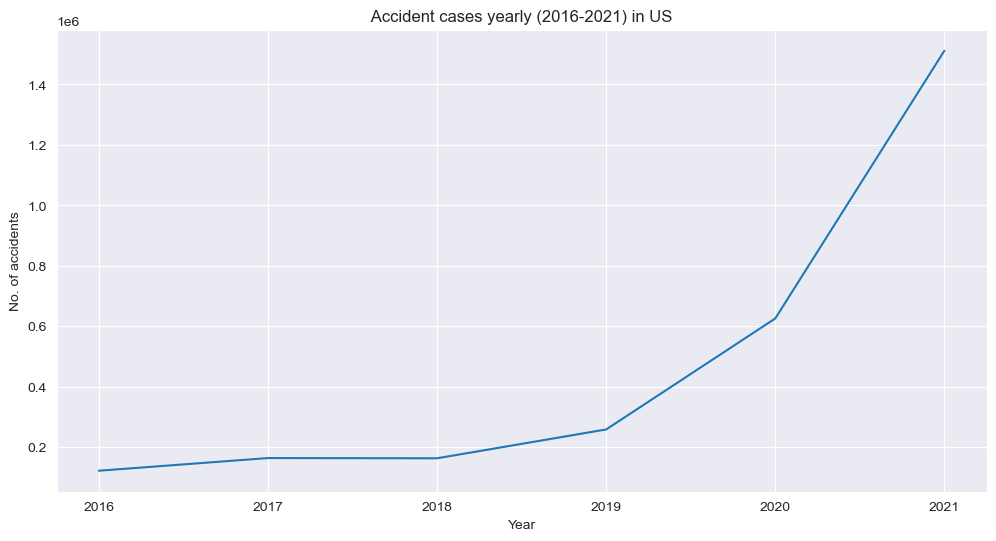

In [36]:
# plt.figure(figsize=(10,5))
sns.lineplot(data = year_max_acc)
plt.title(" Accident cases yearly (2016-2021) in US ",size=12)
plt.xlabel('Year')
plt.ylabel('No. of accidents')

2016


C:\Users\rachit\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


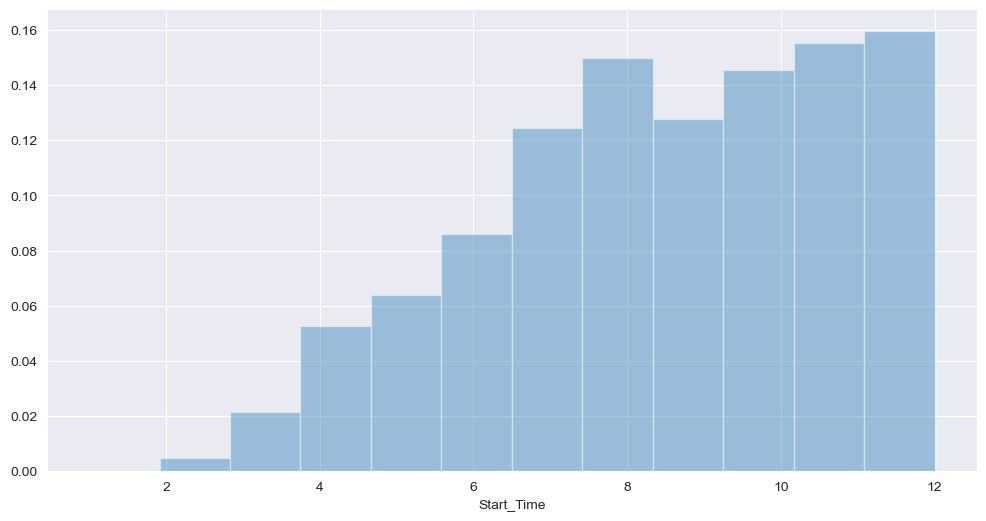

2017


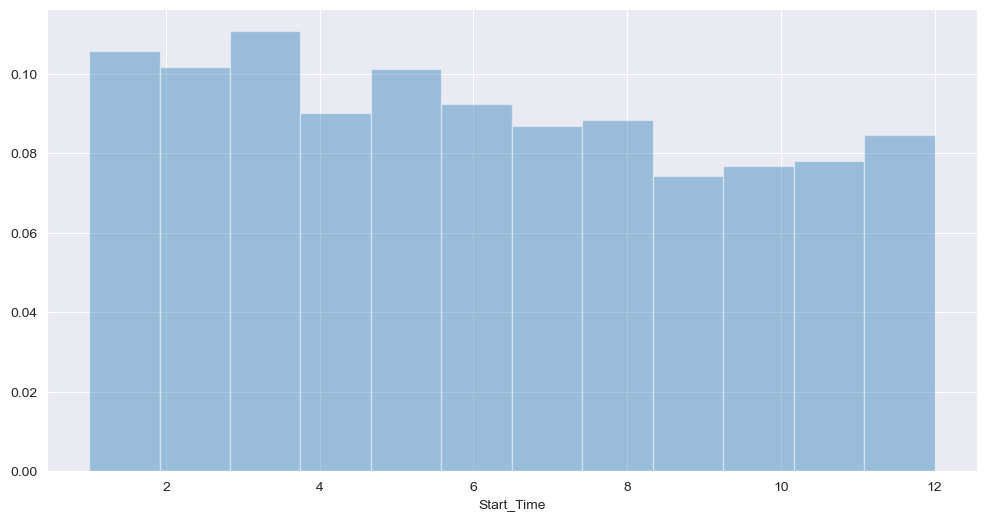

2018


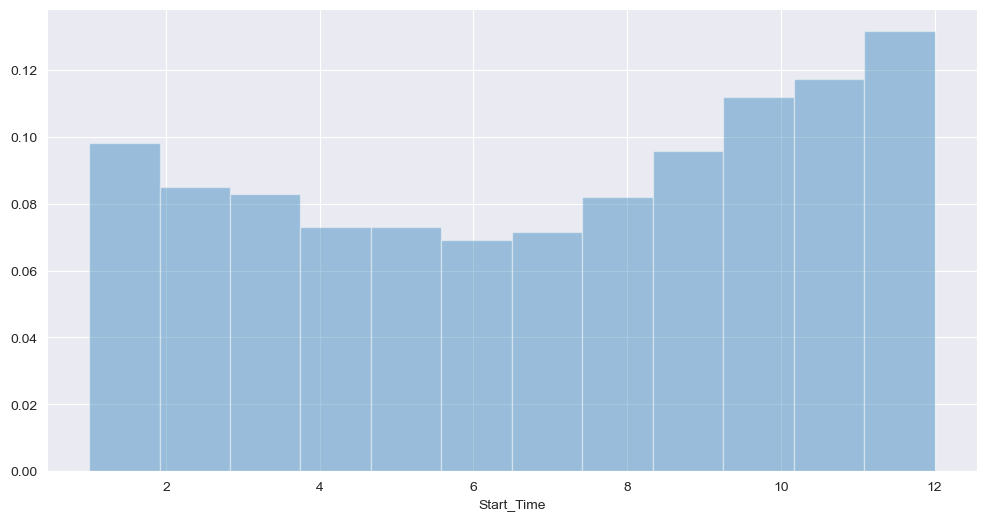

2019


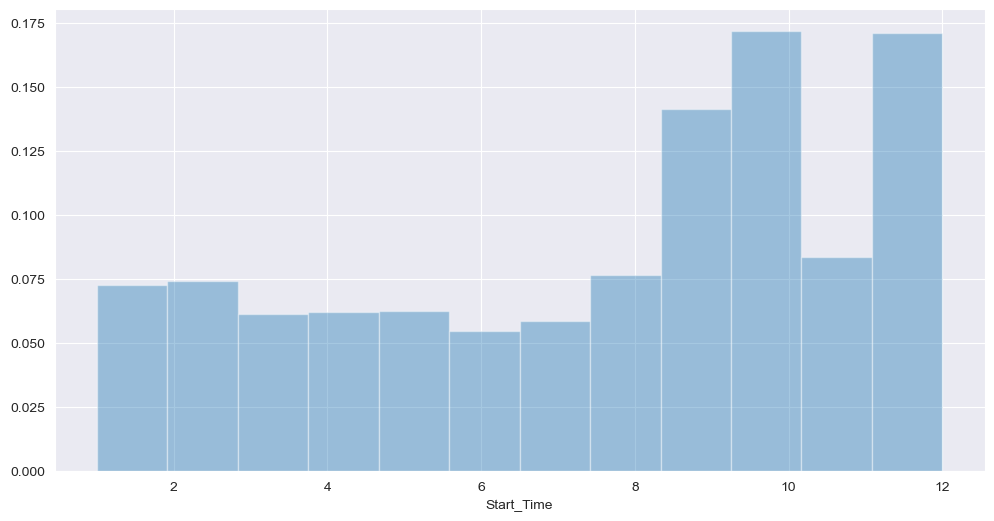

2020


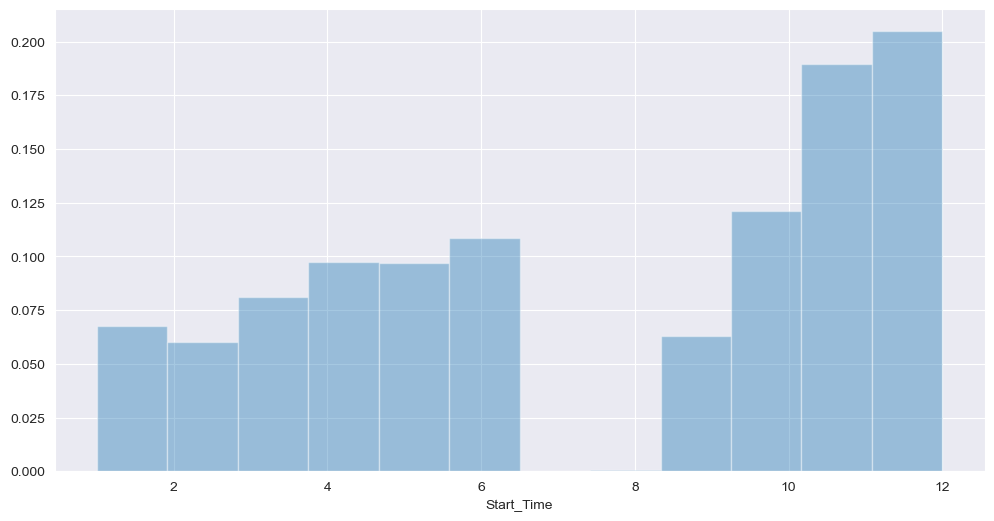

2021


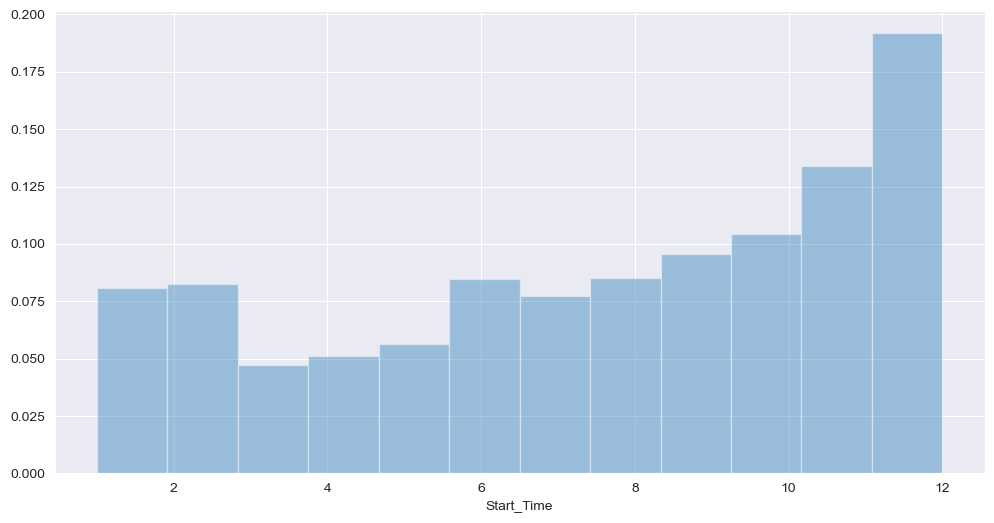

In [37]:
for i in range(2016,2022):
    print(i)
    year = df[df.Start_Time.dt.year==i]
    sns.distplot(year.Start_Time.dt.month,bins=12,kde=False,norm_hist=True)
    plt.show()

#### DATA MISSING in year 2020

# 3. Start Lat and Start Lng


In [38]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [39]:
df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

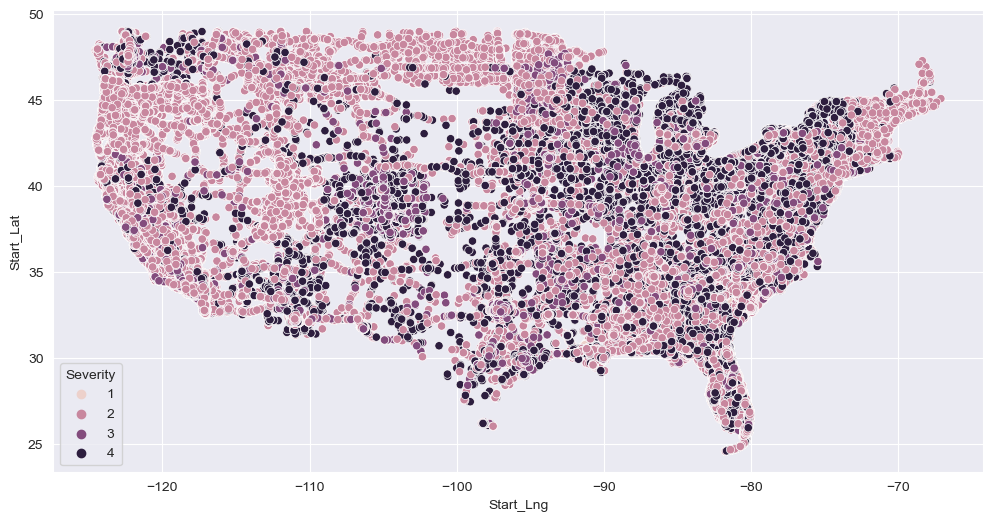

In [40]:
sns.scatterplot(x=df.Start_Lng,y=df.Start_Lat, hue = df.Severity)

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

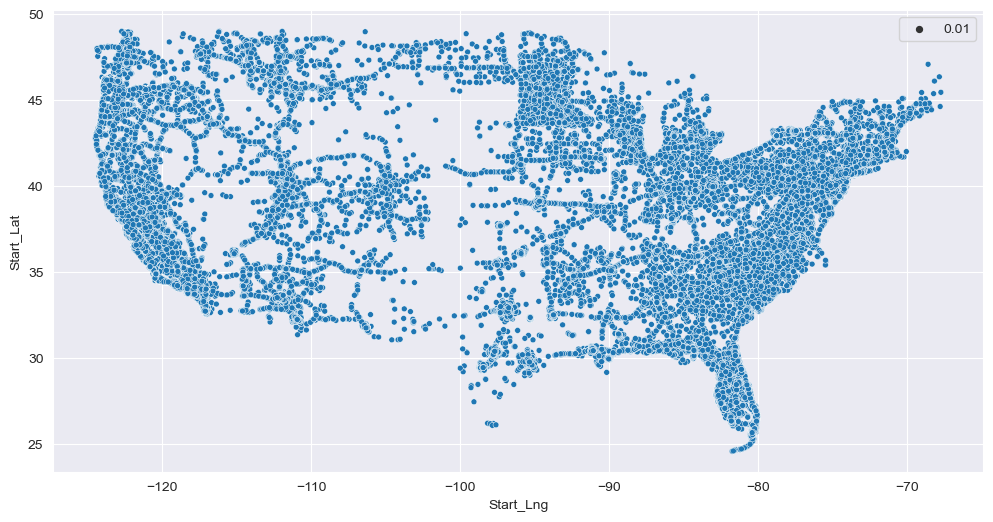

In [41]:
sample_df = df.sample(int(0.1*len(df)))
sns.scatterplot(x=sample_df.Start_Lng,y=sample_df.Start_Lat,size=0.01)

In [42]:
lat,lon = df.Start_Lat[0],df.Start_Lng[0]

import folium
map = folium.Map()
marker = folium.Marker((lat,lon))
marker.add_to(map)
map

In [43]:
from folium.plugins import HeatMap

In [44]:
lat_lon_pairs =  list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [45]:
HeatMap(lat_lon_pairs[:100]).add_to(map)
map

In [46]:
df['Temperature(F)'].isnull().sum()

69274

In [47]:
print(max(df['Temperature(F)']))
print(min(df['Temperature(F)']))

196.0
-89.0


# 4. Weather Condition

In [48]:
# Weather_Condition_aff = df.Weather_Condition.value_counts()
# Weather_Condition_aff
# Weather_Condition_aff.head(10)
df['Weather_Condition']

0             Light Rain
1             Light Rain
2               Overcast
3               Overcast
4             Light Rain
               ...      
2845337             Fair
2845338             Fair
2845339    Partly Cloudy
2845340             Fair
2845341             Fair
Name: Weather_Condition, Length: 2845342, dtype: object

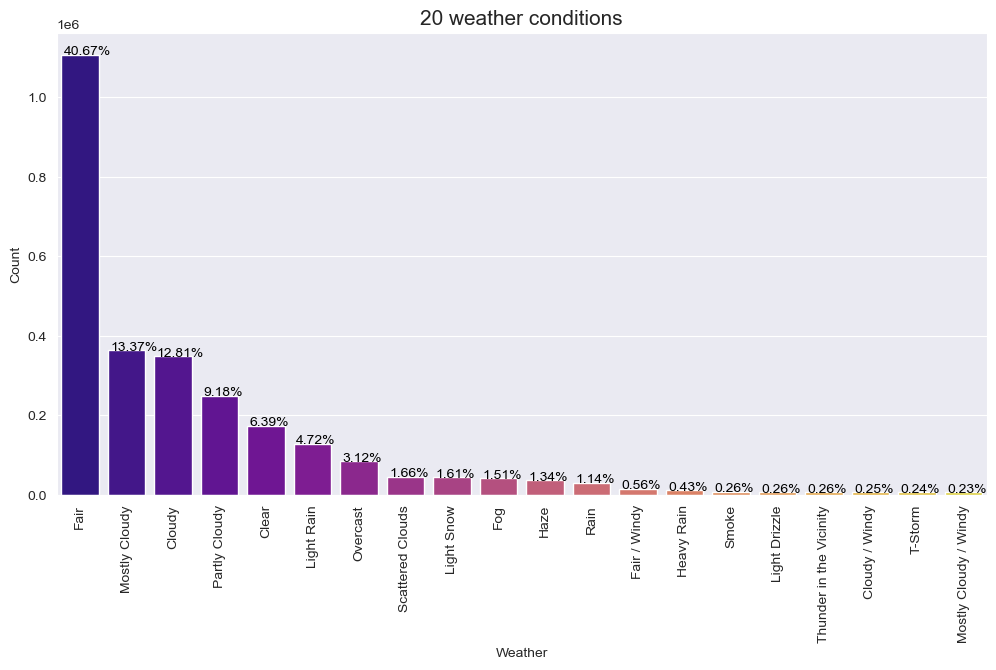

In [49]:
p2 = sns.barplot(x=df.Weather_Condition.value_counts()[:20].sort_values(ascending=False).index,y=df.Weather_Condition.value_counts()[:20].sort_values(ascending=False).values,palette = "plasma")
# Weather_Condition_aff.head(10).plot(kind = 'bar', color = 'orange')
plt.title("20 weather conditions",fontsize=15)
plt.xlabel("Weather")
plt.ylabel("Count")
barplot_values_percent(p2)
plt.xticks(rotation=90)
plt.show()

#### Large number of accidents happened when weather was fair.
#### So Weather cannot be the reason

## Summary and Conclusion

Insights

1. No New York data
2. 95.74% of Cities have low accident rate while 4.24% of Cities have higher
3. Less than 5% cities have more than 1000 yearly accidents.
4. Over 1100 cities have repoerted just one accident.
5. The number of accidents per city decreases exponentially.
6. Weather cannot be the reason for accident.
7. Maximum road accidents took place between 3 PM and 6 PM on both weekdays and weekends.
8. Year 2021 had maximum number of accidents